In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import module
import numpy as np
from sklearn.calibration import calibration_curve
from datetime import timedelta
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [2]:
pd.set_option('mode.chained_assignment', None) # 경고 off

In [3]:
import torch

torch.__version__

'2.2.1'

In [4]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

True


In [5]:
torch.cuda.device_count()
print(torch.version.cuda)
device = torch.device('cuda:0' if USE_CUDA else 'cpu')
#device = torch.device('cpu')
print('학습을 진행하는 기기:',device)
torch.backends.cudnn.allow_tf32 = True

12.1
학습을 진행하는 기기: cuda:0


# Dataload

In [6]:
main_dataset = torch.load("C:\\Users\\DAHS\\Desktop\\AKI\\Model_Optuna\\main_dataset_3D_Optuna.pt")
sub_dataset = torch.load("C:\\Users\\DAHS\\Desktop\\AKI\\Model_Optuna\\sub_dataset_3D_Optuna.pt")

In [7]:
main_dataloaders = [DataLoader(dataset, batch_size=1, shuffle=False, drop_last=True) for dataset in main_dataset]
sub_dataloaders = [DataLoader(dataset, batch_size=1, shuffle=False, drop_last=True) for dataset in sub_dataset]

main_dataloader_6h ,main_dataloader_12h ,main_dataloader_18h ,main_dataloader_24h,main_dataloader_30h ,main_dataloader_36h ,main_dataloader_42h ,main_dataloader_48h = main_dataloaders
sub_dataloader_1 ,sub_dataloader_2 ,sub_dataloader_3, sub_dataloader_3D = sub_dataloaders

In [8]:
calibration_main_dataset = torch.load("C:\\Users\\DAHS\\Desktop\\AKI\\Model_Optuna\\main_dataset_3D_Optuna_calibration.pt")
calibration_sub_dataset = torch.load("C:\\Users\\DAHS\\Desktop\\AKI\\Model_Optuna\\sub_dataset_3D_Optuna_calibration.pt")

In [9]:
calibration_main_dataloaders = [DataLoader(dataset, batch_size=1, shuffle=False, drop_last=True) for dataset in calibration_main_dataset]
calibration_sub_dataloaders = [DataLoader(dataset, batch_size=1, shuffle=False, drop_last=True) for dataset in calibration_sub_dataset]

calibration_main_dataloader_6h, calibration_main_dataloader_12h, calibration_main_dataloader_18h, calibration_main_dataloader_24h, calibration_main_dataloader_30h, calibration_main_dataloader_36h, calibration_main_dataloader_42h, calibration_main_dataloader_48h = calibration_main_dataloaders
calibration_sub_dataloader_1, calibration_sub_dataloader_2, calibration_sub_dataloader_3, calibration_sub_dataloader_3D = calibration_sub_dataloaders

# Probability Curve

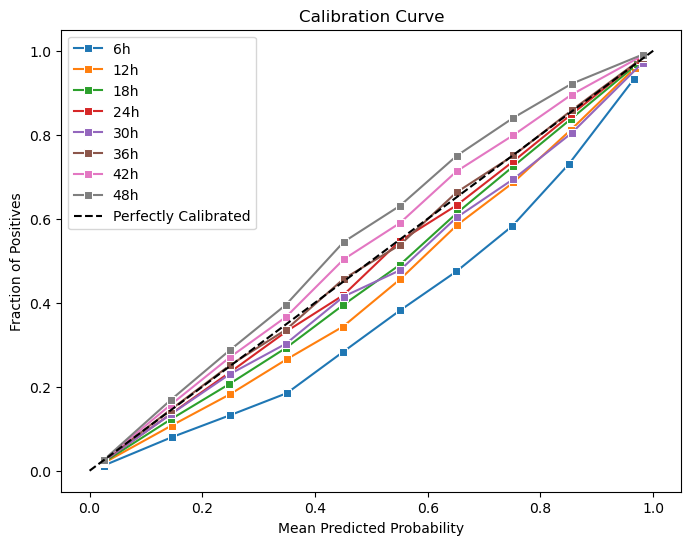

In [10]:
plt.figure(figsize=(8, 6))

y_true, y_scores = module.step_ROC(main_dataloader_6h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="6h")

y_true, y_scores = module.step_ROC(main_dataloader_12h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="12h")

y_true, y_scores = module.step_ROC(main_dataloader_18h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="18h")

y_true, y_scores = module.step_ROC(main_dataloader_24h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="24h")

y_true, y_scores = module.step_ROC(main_dataloader_30h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="30h")

y_true, y_scores = module.step_ROC(main_dataloader_36h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="36h")

y_true, y_scores = module.step_ROC(main_dataloader_42h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="42h")

y_true, y_scores = module.step_ROC(main_dataloader_48h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="48h")

plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

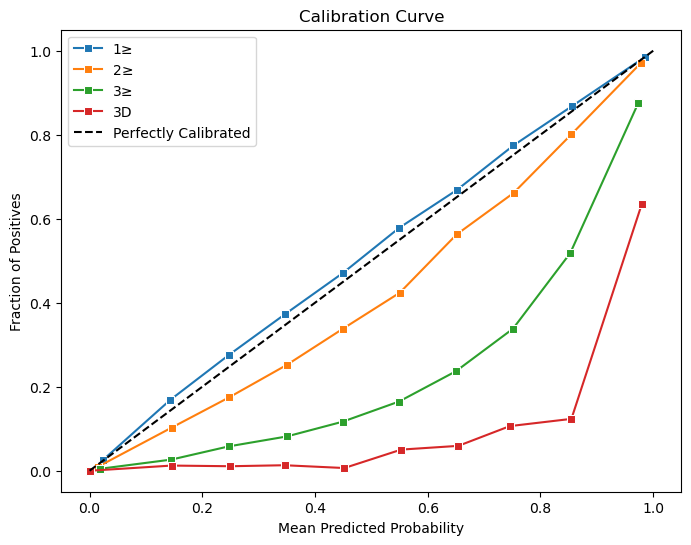

In [11]:
plt.figure(figsize=(8, 6))

y_true, y_scores = module.step_ROC(sub_dataloader_1)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="1≥")

y_true, y_scores = module.step_ROC(sub_dataloader_2)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="2≥")

y_true, y_scores = module.step_ROC(sub_dataloader_3)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="3≥")

y_true, y_scores = module.step_ROC(sub_dataloader_3D)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="3D")

plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

# Calibration

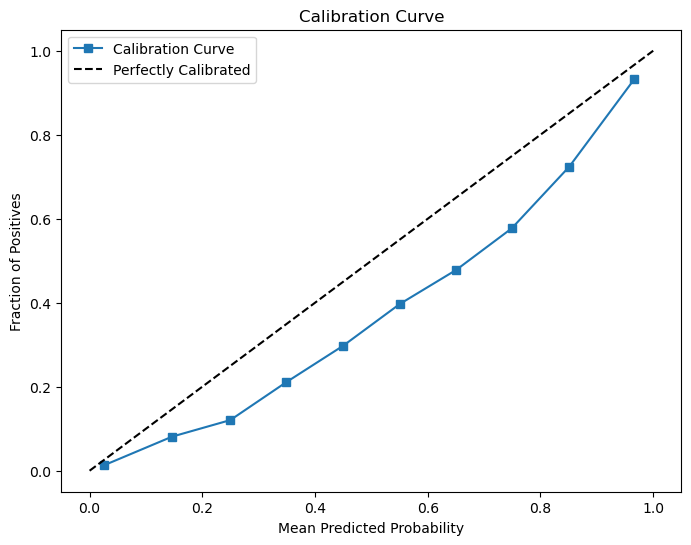

0.10929418935944865 0.09897094344605481


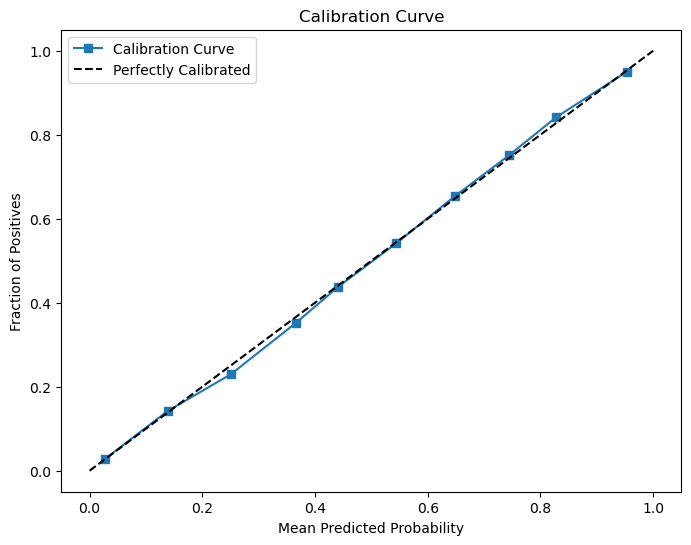

92.8 (92.6-93.0)
86.3 (85.4-86.1)
90.5 (90.3-90.8)
86.4 (85.4-86.4)
78.6 (77.8-79.4)
65.7 (63.2-66.3)


In [12]:
main_dataloader_6h = module.calibration(calibration_main_dataloader_6h, main_dataloader_6h)
module.Result(main_dataloader_6h)

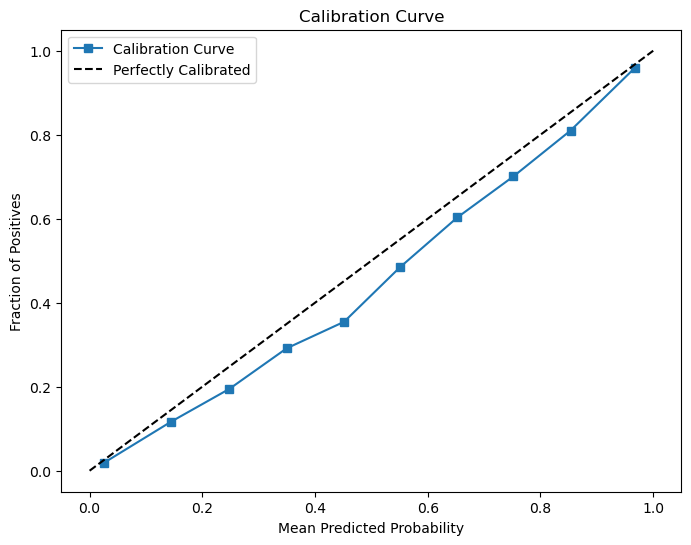

0.09989846550340299 0.09787354358561645


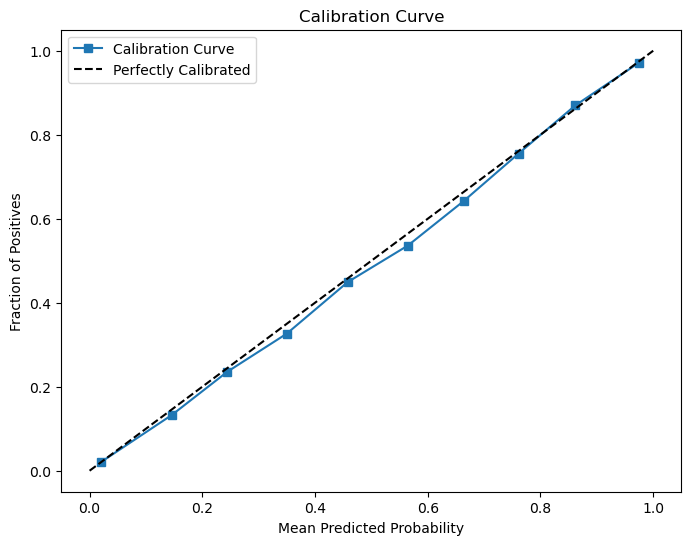

93.8 (93.7-94.0)
91.5 (90.8-91.3)
91.6 (91.4-91.8)
91.7 (91.0-91.5)
78.6 (77.6-79.5)
73.2 (70.7-73.4)


In [13]:
main_dataloader_12h = module.calibration(calibration_main_dataloader_12h, main_dataloader_12h)
module.Result(main_dataloader_12h)

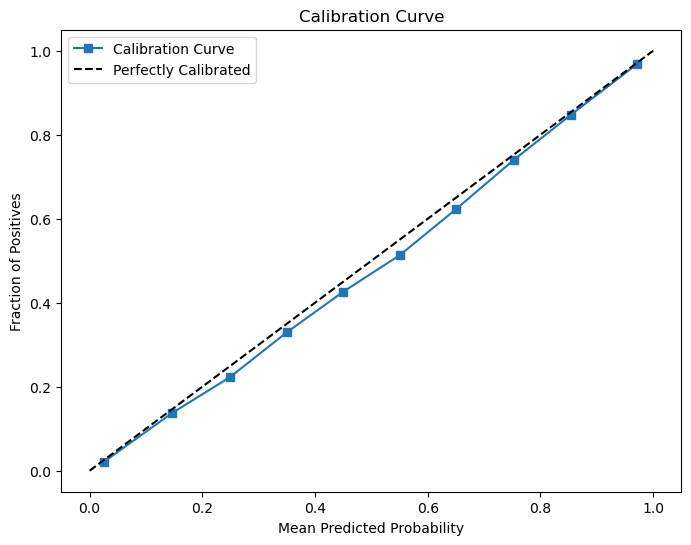

0.08975813527482329 0.0893918552401398


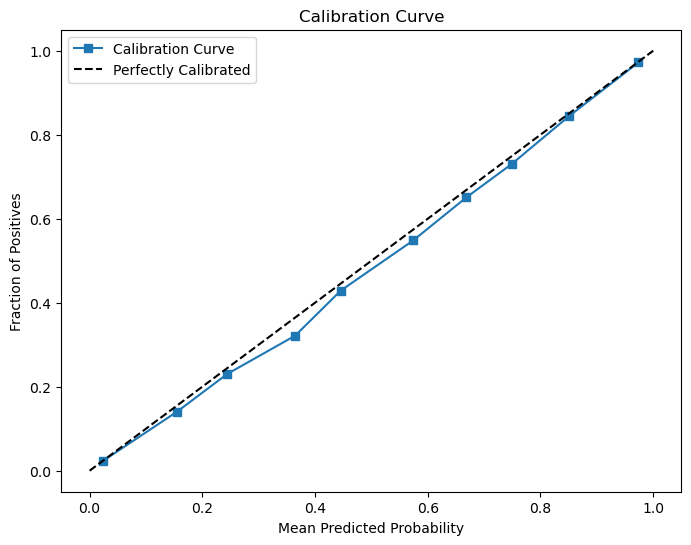

94.9 (94.8-95.1)
94.3 (93.8-94.2)
92.9 (92.8-93.2)
94.5 (94.0-94.4)
81.2 (80.4-82.1)
81.3 (79.5-81.8)


In [14]:
main_dataloader_18h = module.calibration(calibration_main_dataloader_18h, main_dataloader_18h)
module.Result(main_dataloader_18h)

In [15]:
#main_dataloader_24h = module.calibration(calibration_main_dataloader_24h, main_dataloader_24h)
module.Result(main_dataloader_24h)

95.9 (95.7-96.0)
96.0 (95.8-96.1)
94.2 (94.0-94.4)
96.2 (96.0-96.3)
83.9 (82.8-84.7)
87.7 (86.6-88.4)


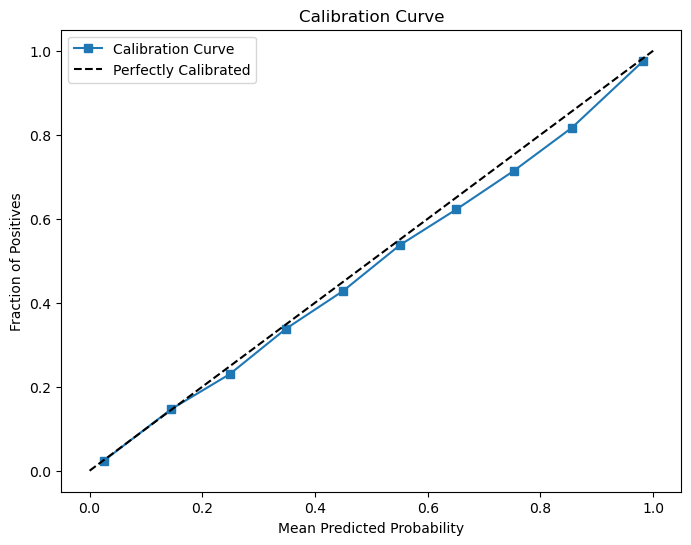

0.07566952938944106 0.07526615610558918


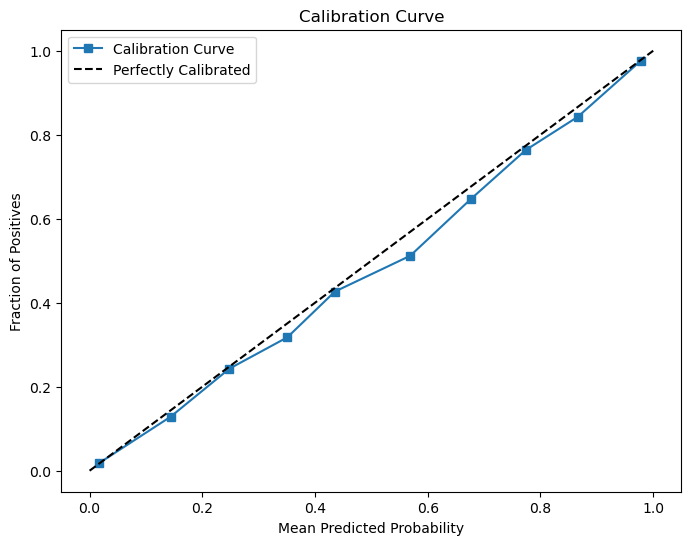

96.4 (96.3-96.5)
96.8 (96.5-96.7)
94.9 (94.7-95.1)
97.0 (96.8-97.0)
85.4 (84.6-86.4)
91.3 (90.2-91.5)


In [16]:
main_dataloader_30h = module.calibration(calibration_main_dataloader_30h, main_dataloader_30h)
module.Result(main_dataloader_30h)

In [17]:
#main_dataloader_36h = module.calibration(calibration_main_dataloader_36h, main_dataloader_36h)
module.Result(main_dataloader_36h)

96.9 (96.8-97.0)
97.4 (97.3-97.5)
95.6 (95.4-95.8)
97.7 (97.6-97.8)
87.2 (86.3-88.1)
93.9 (93.3-94.5)


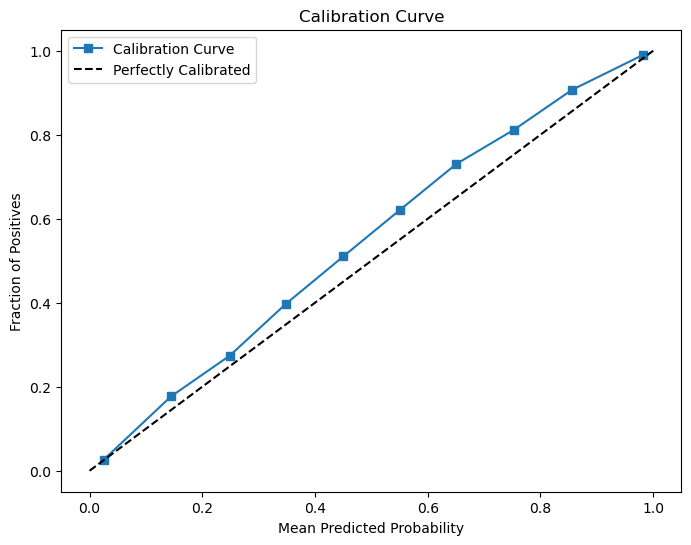

0.06592141629509043 0.06568150795950586


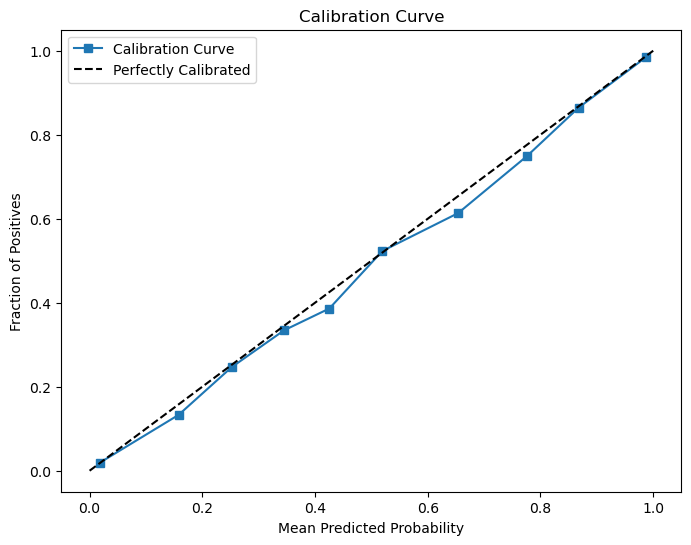

97.2 (97.0-97.3)
97.8 (97.6-97.7)
96.0 (95.9-96.2)
98.0 (97.8-98.0)
88.4 (87.6-89.2)
95.5 (94.8-95.6)


In [18]:
main_dataloader_42h = module.calibration(calibration_main_dataloader_42h, main_dataloader_42h)
module.Result(main_dataloader_42h)

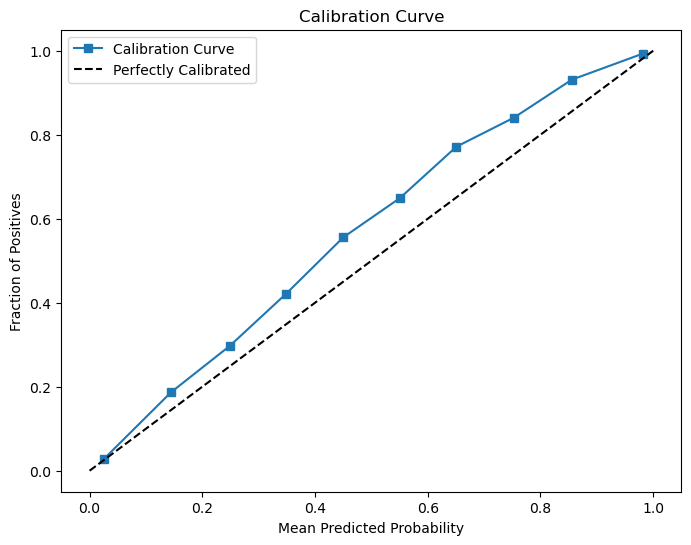

0.06417221954359571 0.06285749072319777


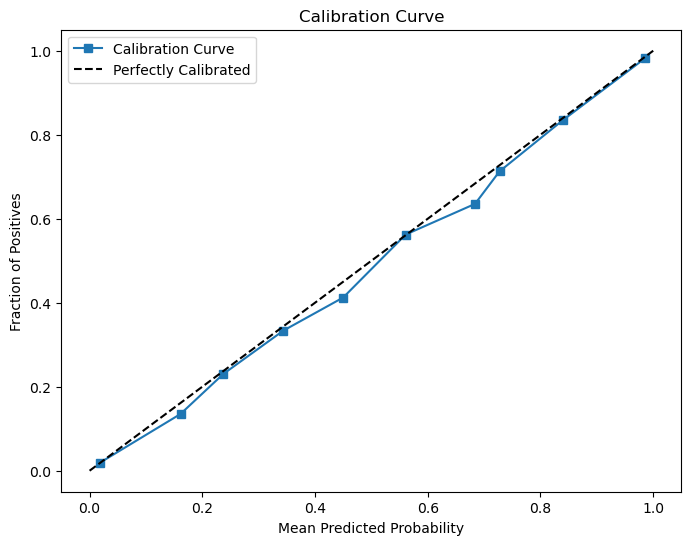

97.4 (97.3-97.5)
98.0 (97.8-98.0)
96.4 (96.2-96.5)
98.3 (98.1-98.3)
89.4 (88.6-90.4)
96.6 (96.0-96.7)


In [19]:
main_dataloader_48h = module.calibration(calibration_main_dataloader_48h, main_dataloader_48h)
module.Result(main_dataloader_48h)

In [20]:
#sub_dataloader_1 = module.calibration(calibration_sub_dataloader_1, sub_dataloader_1)
module.Result(sub_dataloader_1)

97.3 (97.2-97.4)
98.0 (97.9-98.1)
96.3 (96.2-96.4)
98.3 (98.2-98.3)
88.7 (87.8-89.7)
96.4 (96.0-96.7)


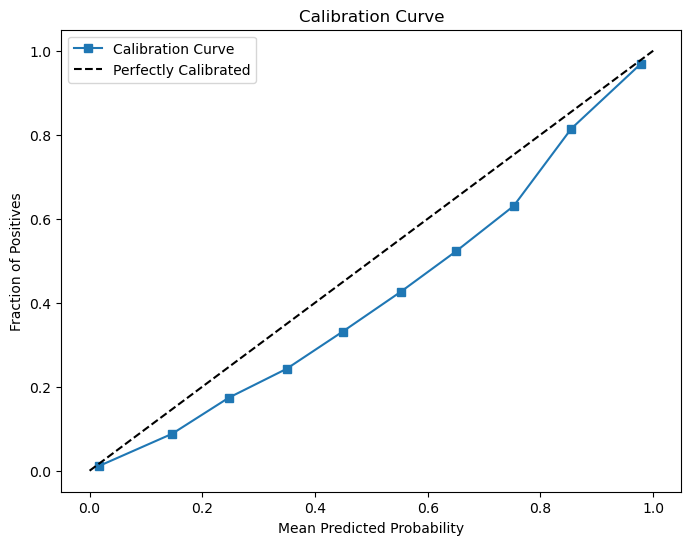

0.06803662568922149 0.06606620563156104


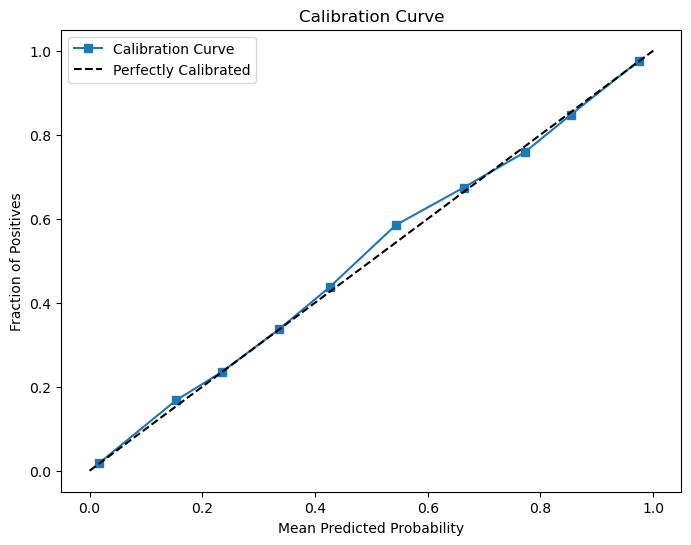

97.1 (97.0-97.2)
96.4 (95.9-96.2)
95.5 (95.4-95.7)
97.2 (96.9-97.2)
88.4 (87.3-89.2)
92.8 (91.5-92.9)


In [21]:
sub_dataloader_2 = module.calibration(calibration_sub_dataloader_2, sub_dataloader_2)
module.Result(sub_dataloader_2)

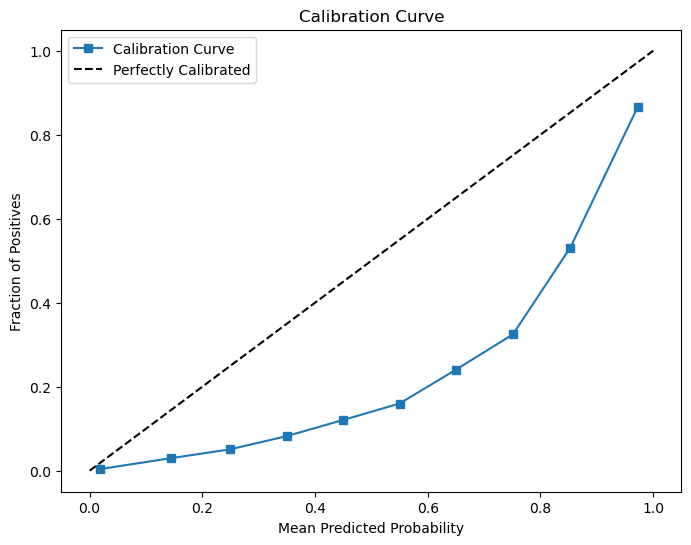

0.07827388074210041 0.049317496767827484


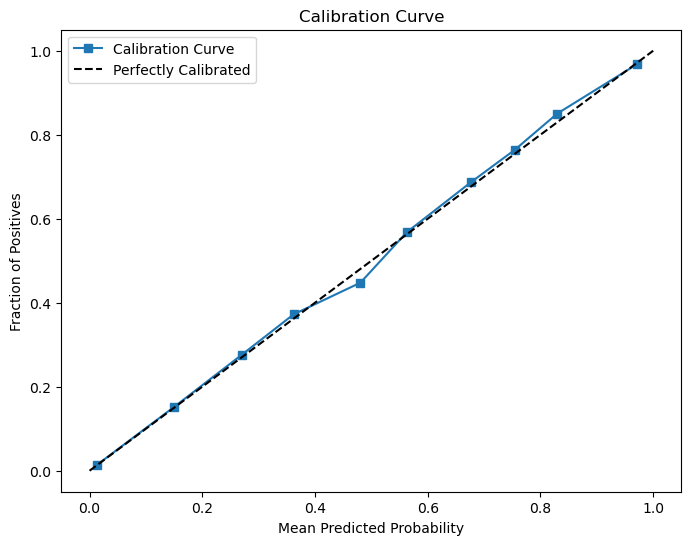

96.6 (96.5-96.8)
88.4 (87.2-88.1)
92.3 (92.0-92.7)
93.5 (92.7-93.5)
80.1 (78.4-81.5)
69.8 (66.0-70.9)


In [22]:
sub_dataloader_3 = module.calibration(calibration_sub_dataloader_3, sub_dataloader_3)
module.Result(sub_dataloader_3)

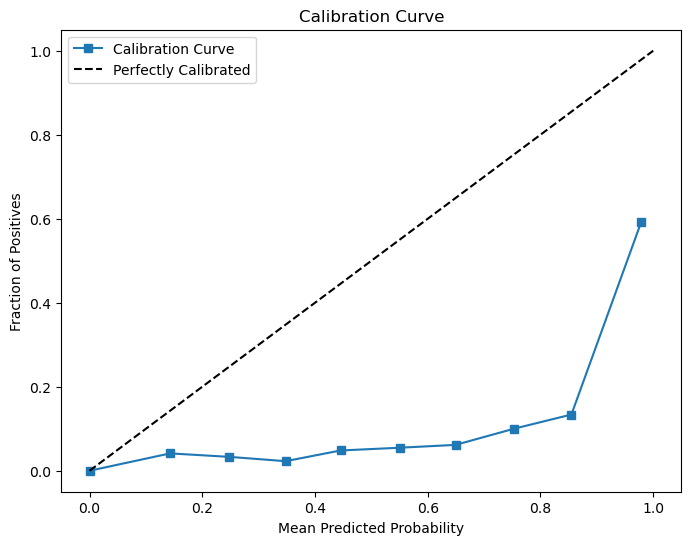

0.012760747265626928 0.0037905386969557865


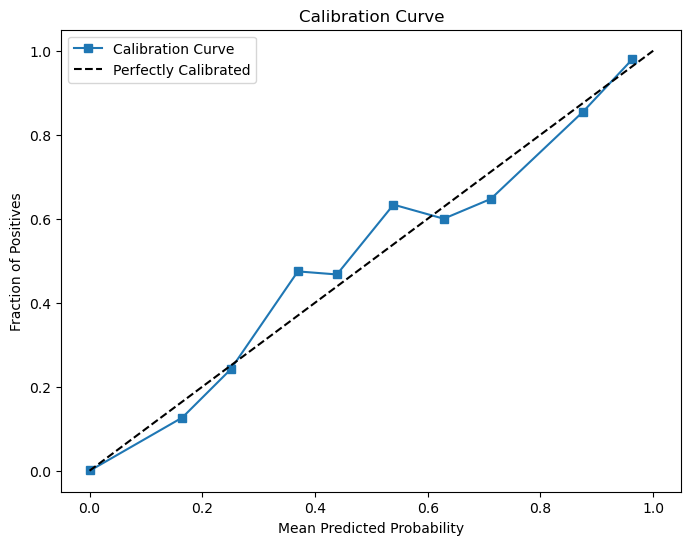

99.8 (99.8-99.8)
90.0 (87.3-90.5)
98.3 (97.8-98.8)
99.1 (98.6-99.2)
97.8 (97.0-98.5)
93.6 (90.4-95.0)


In [23]:
sub_dataloader_3D = module.calibration(calibration_sub_dataloader_3D, sub_dataloader_3D)
module.Result(sub_dataloader_3D)

# Calibration Curve

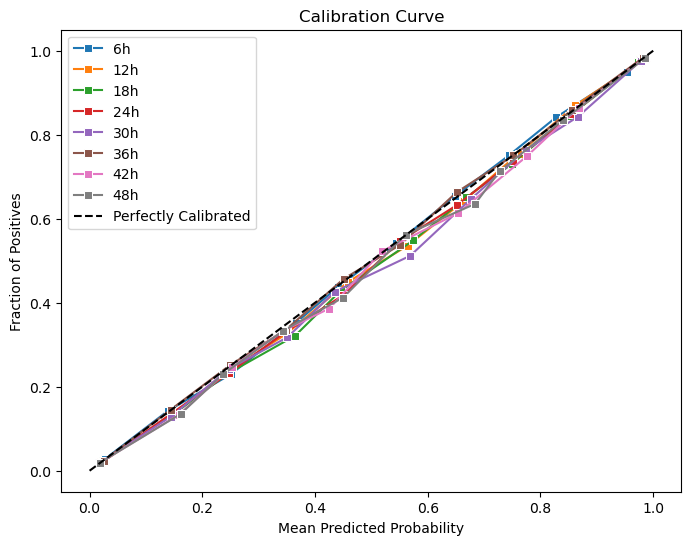

In [24]:
plt.figure(figsize=(8, 6))

y_true, y_scores = module.step_ROC(main_dataloader_6h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="6h")

y_true, y_scores = module.step_ROC(main_dataloader_12h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="12h")

y_true, y_scores = module.step_ROC(main_dataloader_18h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="18h")

y_true, y_scores = module.step_ROC(main_dataloader_24h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="24h")

y_true, y_scores = module.step_ROC(main_dataloader_30h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="30h")

y_true, y_scores = module.step_ROC(main_dataloader_36h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="36h")

y_true, y_scores = module.step_ROC(main_dataloader_42h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="42h")

y_true, y_scores = module.step_ROC(main_dataloader_48h)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="48h")

plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

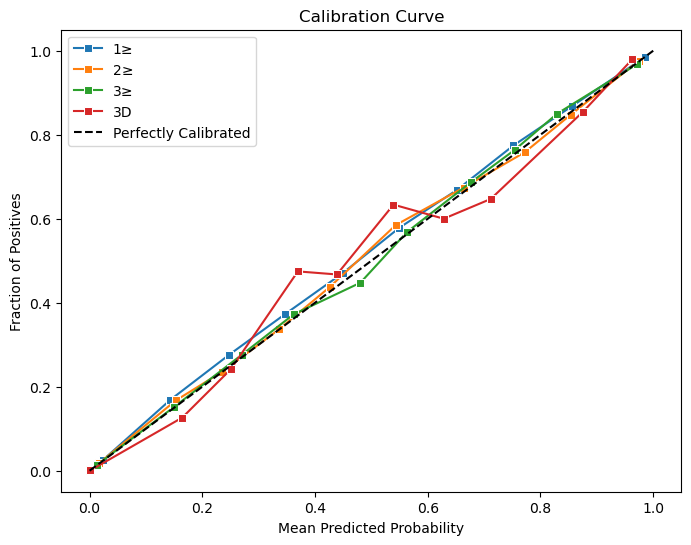

In [25]:
plt.figure(figsize=(8, 6))

y_true, y_scores = module.step_ROC(sub_dataloader_1)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="1≥")

y_true, y_scores = module.step_ROC(sub_dataloader_2)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="2≥")

y_true, y_scores = module.step_ROC(sub_dataloader_3)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="3≥")

y_true, y_scores = module.step_ROC(sub_dataloader_3D)
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_scores, n_bins=10)
sns.lineplot(x =mean_predicted_value, y=fraction_of_positives, marker='s' ,label="3D")

plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()

Main Recall 90%

In [39]:
y_true_main, y_scores_main = module.step_ROC(main_dataloader_48h)
fpr, tpr, AUROC_thresholds, auroc = module.AUROC(y_true_main,y_scores_main)
recall, precision, AUPRC_thresholds_48, auprc = module.AUPRC(y_true_main,y_scores_main)

recall = np.round(recall,4)
recall = pd.DataFrame(recall)
precision = np.round(precision,4)
precision = pd.DataFrame(precision)

In [40]:
index = 111 # Recall_90

print(recall.iloc[index])
print(precision.iloc[index])
thresholds_main = AUPRC_thresholds_48[index]
thresholds_sub_1 = thresholds_main
thresholds_sub_2 = thresholds_main
thresholds_sub_3 = thresholds_main
thresholds_sub_3D = thresholds_main

y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_zero_index = module.AKI_first_ROC_zero(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_3D_list_success, CEP_3D_list_failure = module.AKI_full_3D(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_AKI_list = module.AKI_full_AKI(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)

0    0.9055
Name: 111, dtype: float64
0    0.9364
Name: 111, dtype: float64
1445
1323
0.9155709342560554
56
6
0.10714285714285714
46
10
3879
644
3451
639


In [41]:
y_true_main, y_scores_main = module.step_ROC(main_dataloader_48h)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 91.2 %
Precision : 93.60000000000001 %
Sensitivity : 90.5 %
Specitivity : 92.10000000000001 %
F1 score : 0.921


(36508, 2481, 28884, 3811)

In [42]:
y_true_main, y_scores_main = module.step_ROC(sub_dataloader_1)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 91.10000000000001 %
Precision : 94.39999999999999 %
Sensitivity : 89.5 %
Specitivity : 93.10000000000001 %
F1 score : 0.918


(36070, 2159, 29206, 4249)

Main Recall 80%

In [44]:
index = 140 # Recall_80

print(recall.iloc[index])
print(precision.iloc[index])
thresholds_main = AUPRC_thresholds_48[index]
thresholds_sub_1 = thresholds_main
thresholds_sub_2 = thresholds_main
thresholds_sub_3 = thresholds_main
thresholds_sub_3D = thresholds_main

y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_zero_index = module.AKI_first_ROC_zero(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_3D_list_success, CEP_3D_list_failure = module.AKI_full_3D(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_AKI_list = module.AKI_full_AKI(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)

0    0.8003
Name: 140, dtype: float64
0    0.9771
Name: 140, dtype: float64
1445
1417
0.9806228373702423
56
2
0.03571428571428571
46
10
3879
478
3451
478


In [45]:
y_true_main, y_scores_main = module.step_ROC(main_dataloader_48h)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 87.7 %
Precision : 97.7 %
Sensitivity : 80.0 %
Specitivity : 97.6 %
F1 score : 0.88


(32267, 757, 30608, 8052)

In [46]:
y_true_main, y_scores_main = module.step_ROC(sub_dataloader_1)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 87.4 %
Precision : 97.7 %
Sensitivity : 79.5 %
Specitivity : 97.6 %
F1 score : 0.877


(32051, 740, 30625, 8268)

Main Recall 70%

In [48]:
index = 161 # Recall_70

print(recall.iloc[index])
print(precision.iloc[index])
thresholds_main = AUPRC_thresholds_48[index]
thresholds_sub_1 = thresholds_main
thresholds_sub_2 = thresholds_main
thresholds_sub_3 = thresholds_main
thresholds_sub_3D = thresholds_main

y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_zero_index = module.AKI_first_ROC_zero(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_3D_list_success, CEP_3D_list_failure = module.AKI_full_3D(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_AKI_list = module.AKI_full_AKI(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)

0    0.7151
Name: 161, dtype: float64
0    0.9875
Name: 161, dtype: float64
1445
1430
0.9896193771626297
56
0
0.0
46
10
3879
179
3451
179


In [49]:
y_true_main, y_scores_main = module.step_ROC(main_dataloader_48h)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 83.5 %
Precision : 98.7 %
Sensitivity : 71.5 %
Specitivity : 98.8 %
F1 score : 0.83


(28832, 365, 31000, 11487)

In [50]:
y_true_main, y_scores_main = module.step_ROC(sub_dataloader_1)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 80.9 %
Precision : 99.1 %
Sensitivity : 66.60000000000001 %
Specitivity : 99.2 %
F1 score : 0.797


(26856, 241, 31124, 13463)

Sub Recall 90%

In [52]:
y_true_sub, y_scores_sub = module.step_ROC(sub_dataloader_1)
fpr, tpr, AUROC_thresholds,auroc = module.AUROC(y_true_sub,y_scores_sub)
recall, precision, AUPRC_thresholds_1, auprc = module.AUPRC(y_true_sub,y_scores_sub)

recall = np.round(recall,4)
recall = pd.DataFrame(recall)
precision = np.round(precision,4)
precision = pd.DataFrame(precision)

In [53]:
index = 33060 # Recall_90

print(recall.iloc[index])
print(precision.iloc[index])
thresholds_main = AUPRC_thresholds_1[index]
thresholds_sub_1 = thresholds_main
thresholds_sub_2 = thresholds_main
thresholds_sub_3 = thresholds_main
thresholds_sub_3D = thresholds_main

y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_zero_index = module.AKI_first_ROC_zero(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_3D_list_success, CEP_3D_list_failure = module.AKI_full_3D(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_AKI_list = module.AKI_full_AKI(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)

0    0.9
Name: 33060, dtype: float64
0    0.9399
Name: 33060, dtype: float64
1445
1322
0.914878892733564
56
6
0.10714285714285714
46
10
3879
682
3451
676


In [54]:
y_true_main, y_scores_main = module.step_ROC(main_dataloader_48h)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 91.2 %
Precision : 93.60000000000001 %
Sensitivity : 90.60000000000001 %
Specitivity : 92.10000000000001 %
F1 score : 0.921


(36509, 2482, 28883, 3810)

In [55]:
y_true_main, y_scores_main = module.step_ROC(sub_dataloader_1)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 91.10000000000001 %
Precision : 94.0 %
Sensitivity : 90.0 %
Specitivity : 92.60000000000001 %
F1 score : 0.92


(36289, 2320, 29045, 4030)

Sub Recall 80%

In [56]:
index = 38633 # Recall_80

print(recall.iloc[index])
print(precision.iloc[index])
thresholds_main = AUPRC_thresholds_1[index]
thresholds_sub_1 = thresholds_main
thresholds_sub_2 = thresholds_main
thresholds_sub_3 = thresholds_main
thresholds_sub_3D = thresholds_main

y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_zero_index = module.AKI_first_ROC_zero(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_3D_list_success, CEP_3D_list_failure = module.AKI_full_3D(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_AKI_list = module.AKI_full_AKI(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)

0    0.8
Name: 38633, dtype: float64
0    0.9765
Name: 38633, dtype: float64
1445
1414
0.9785467128027682
56
4
0.07142857142857142
46
10
3879
474
3451
474


In [57]:
y_true_main, y_scores_main = module.step_ROC(main_dataloader_48h)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 88.2 %
Precision : 97.39999999999999 %
Sensitivity : 81.2 %
Specitivity : 97.3 %
F1 score : 0.886


(32722, 857, 30508, 7597)

In [58]:
y_true_main, y_scores_main = module.step_ROC(sub_dataloader_1)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 87.7 %
Precision : 97.7 %
Sensitivity : 80.0 %
Specitivity : 97.5 %
F1 score : 0.88


(32257, 775, 30590, 8062)

Sub Recall 70%

In [59]:
index = 43092 # Recall_70

print(recall.iloc[index])
print(precision.iloc[index])
thresholds_main = AUPRC_thresholds_1[index]
thresholds_sub_1 = thresholds_main
thresholds_sub_2 = thresholds_main
thresholds_sub_3 = thresholds_main
thresholds_sub_3D = thresholds_main

y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_zero_index = module.AKI_first_ROC_zero(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_3D_list_success, CEP_3D_list_failure = module.AKI_full_3D(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)
y_true_origin_list, y_true_list, y_pred_list_main, y_pred_list_sub_1, y_pred_list_sub_2, y_pred_list_sub_3, y_pred_list_sub_3D, y_true_sub_list, CEP_AKI_list = module.AKI_full_AKI(main_dataloader_48h,sub_dataloader_1,sub_dataloader_2,sub_dataloader_3,sub_dataloader_3D, thresholds_main, thresholds_sub_1, thresholds_sub_2, thresholds_sub_3, thresholds_sub_3D)

0    0.7
Name: 43092, dtype: float64
0    0.9882
Name: 43092, dtype: float64
1445
1428
0.9882352941176471
56
0
0.0
46
10
3879
274
3451
274


In [60]:
y_true_main, y_scores_main = module.step_ROC(main_dataloader_48h)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 84.6 %
Precision : 98.5 %
Sensitivity : 73.7 %
Specitivity : 98.6 %
F1 score : 0.844


(29735, 441, 30924, 10584)

In [61]:
y_true_main, y_scores_main = module.step_ROC(sub_dataloader_1)
module.calculate_confusion_matrix(y_true_main, y_scores_main, thresholds_main)

Accuracy : 82.69999999999999 %
Precision : 98.8 %
Sensitivity : 70.0 %
Specitivity : 98.9 %
F1 score : 0.82


(28225, 336, 31029, 12094)